#**Harry O'Donnell**
##**C20379081**
##**Environmental Analytics**

In [1]:
!pip install basemap

##**Finding & Retrieving the datasets**

I retrieved the datasets for the rainfall, wind and tempertaure from [Rainfall Data](https://data.gov.ie/dataset/mtm01-rainfall)  [Temperature Data](https://data.gov.ie/dataset/mtm02-temperature)   [Wind Gusts Data](https://data.gov.ie/dataset/mtm04-wind-maximum-gale-gust-335-knots)

This only included the name of the 12 main meteorlogical stations in Ireland, not the sptial data required...

I got the cooridnates for the weather stations fromthe Met website and convert them from DMS to demcial degree using an online converter. [Met Eireann weather station Coordinates](https://www.met.ie/climate/weather-observing-stations)



In [2]:
import pandas as pd

# Load the datasets
wind_data = pd.read_csv('WindGusts.csv')
flood_data = pd.read_csv('PercipitationAmount.csv')
heat_data = pd.read_csv('MaxTemp.csv')

print(wind_data.head())
print(flood_data.head())
print(heat_data.head())


   Statistic Label         Month Meteorological Weather Station   UNIT  VALUE
0  Mean Wind Speed  1960 January                     Malin Head  Knots   11.9
1  Mean Wind Speed  1960 January                    Claremorris  Knots    7.0
2  Mean Wind Speed  1960 January           Valentia Observatory  Knots   10.0
3  Mean Wind Speed  1960 January                      Belmullet  Knots   11.2
4  Mean Wind Speed  1960 January                Shannon Airport  Knots    8.8
        Statistic Label         Month Meteorological Weather Station  \
0  Precipitation Amount  1960 January                     Malin Head   
1  Precipitation Amount  1960 January                    Claremorris   
2  Precipitation Amount  1960 January           Valentia Observatory   
3  Precipitation Amount  1960 January                      Belmullet   
4  Precipitation Amount  1960 January                Shannon Airport   

          UNIT  VALUE  
0  Millimetres  113.0  
1  Millimetres  113.9  
2  Millimetres  164.4  
3  

##**Data Preparation and Exploration:**
1. I reformatted the month column to datatime data type and dropped the UNIT and Statstics Label Columns for each of the weather datasets.

2. I then merged all there files into one to combined file which included all the data.

3. I dropped rows where all there columns are blank, but where there is just one or 2 columns blank in a row I clauclated and added the mean value.

In [3]:
# Preprocess rain data
flood_data['Month'] = pd.to_datetime(flood_data['Month'], format='%Y %B')
flood_data = flood_data.drop(columns=['UNIT', 'Statistic Label'])
flood_data.rename(columns={'VALUE': 'Precipitation'}, inplace=True)
print(flood_data.head())

       Month Meteorological Weather Station  Precipitation
0 1960-01-01                     Malin Head          113.0
1 1960-01-01                    Claremorris          113.9
2 1960-01-01           Valentia Observatory          164.4
3 1960-01-01                      Belmullet          101.0
4 1960-01-01                Shannon Airport           83.1


In [4]:
# Preprocess temp data
heat_data['Month'] = pd.to_datetime(heat_data['Month'], format='%Y %B')
heat_data = heat_data.drop(columns=['UNIT', 'Statistic Label'])
heat_data.rename(columns={'VALUE': 'Temperature'}, inplace=True)
print(heat_data.head())

       Month Meteorological Weather Station  Temperature
0 1960-01-01                     Malin Head          8.0
1 1960-01-01                    Claremorris          7.0
2 1960-01-01           Valentia Observatory          9.5
3 1960-01-01                      Belmullet          8.3
4 1960-01-01                Shannon Airport          8.2


In [5]:
# Preprocess wind data
wind_data['Month'] = pd.to_datetime(wind_data['Month'], format='%Y %B')
wind_data = wind_data.drop(columns=['UNIT', 'Statistic Label'])
wind_data.rename(columns={'VALUE': 'Wind'}, inplace=True)
print(wind_data.head())

       Month Meteorological Weather Station  Wind
0 1960-01-01                     Malin Head  11.9
1 1960-01-01                    Claremorris   7.0
2 1960-01-01           Valentia Observatory  10.0
3 1960-01-01                      Belmullet  11.2
4 1960-01-01                Shannon Airport   8.8


In [6]:
# join rain with wind data
combined_data = pd.merge(wind_data, flood_data, on=['Month', 'Meteorological Weather Station'], how='outer')

# join the result with temp data
combined_data = pd.merge(combined_data, heat_data, on=['Month', 'Meteorological Weather Station'], how='outer')

In [7]:
# First, drop rows where all three columns are NaN
combined_data.dropna(subset=['Precipitation', 'Temperature', 'Wind'], how='all', inplace=True)

# Calculate the mean of each column excluding NaN values
precipitation_mean = combined_data['Precipitation'].mean()
sunshine_mean = combined_data['Temperature'].mean()
wind_mean = combined_data['Wind'].mean()

# Fill NaN values in each column with the respective means
combined_data['Precipitation'].fillna(precipitation_mean, inplace=True)
combined_data['Temperature'].fillna(sunshine_mean, inplace=True)
combined_data['Wind'].fillna(wind_mean, inplace=True)

combined_data['Month'] = pd.to_datetime(heat_data['Month'], format='%Y %B')

In [8]:
# Create a combined data csv file
print(combined_data.head())
print(combined_data.dtypes)
combined_data.to_csv('combined_data.csv', index=False)

       Month Meteorological Weather Station  Wind  Precipitation  Temperature
0 1960-01-01                     Malin Head  11.9          113.0          8.0
1 1960-01-01                     Malin Head  11.9          113.0          3.3
2 1960-01-01                     Malin Head  11.9          113.0          5.7
3 1960-01-01                     Malin Head  11.9          113.0         12.3
4 1960-01-01                     Malin Head  11.9          113.0         -2.8
Month                             datetime64[ns]
Meteorological Weather Station            object
Wind                                     float64
Precipitation                            float64
Temperature                              float64
dtype: object


---

## **Retrieving the spatial data**

- I got the cooridnates for the weather stations from the Met website and convert them from DMS to demcial degree using an online converter. [Met Eireann weather station Coordinates](https://www.met.ie/climate/weather-observing-stations)

- The spatial data was then added to the combined meteorlogical weather stations dataset

###**Meteorlogical Weather Stations Coordinates**

Malin Head Latitude: 55.3722° N Longitude: -7.3389° W

Claremorris Latitude: 53.7108° N Longitude: -8.9925° W

Valentia Observatory Latitude: 51.9397° N Longitude: -10.2444° W

Belmullet Latitude: 54.2275° N Longitude: -10.0069° W

Shannon Airport Latitude: 52.6930° N Longitude: -8.9205° W

Dublin Airport Latitude: 53.4256° N Longitude: -6.2574° W

Mullingar Latitude: 53.5372° N Longitude: -7.3622° W

Cork Airport Latitude: 51.8491° N Longitude: -8.4899° W

Casement Latitude: 53.3090° N Longitude: -6.4414° W

Phoenix Park Latitude: 53.3639° N Longitude: -6.3333° W

Roches Point Latitude: 51.7931° N Longitude: -8.2444° W

Markree Latitude: 54.1750° N Longitude: -8.4556° W

---

###**Found out the approximate distance from the weather stations to the coast**
There wasn't any dataset which provided the distance, so I used google maps to find the limit to the nearest coast.



- Malin head 0km
- Roches point 0km
- Valentia 0km
- Belmullet 4km
- cork aiport 15km
- Claremorris 45km
- dublin airport 10km
- casement 22km
- phoneix park 18km
- shannon airport 5km
- markree 17km
- mullingar 160km


---

I then catergorised them into coastal and inland stations, if the weather stations is less than 10kms from the coast I'll assign it as coastal and otheriwse inland


In [12]:
import pandas as pd

data = {
    "Meteorological Weather Station": ["Malin Head", "Claremorris", "Valentia Observatory", "Belmullet",
                                       "Shannon Airport", "Dublin Airport", "Mullingar", "Cork Airport",
                                       "Casement", "Phoenix Park", "Roches Point", "Markree"],
    "Latitude": [55.3722, 53.7108, 51.9397, 54.2275, 52.6930, 53.4256, 53.5372, 51.8491, 53.3090, 53.3639, 51.7931, 54.1750],
    "Longitude": [-7.3389, -8.9925, -10.2444, -10.0069, -8.9205, -6.2574, -7.3622, -8.4899, -6.4414, -6.3333, -8.2444, -8.4556]
}

coordinates_df = pd.DataFrame(data)

# coastal / inland function
def classify_station(station_name):
    coastal_stations = ['Roches Point', 'Valentia Observatory', 'Shannon Airport', 'Belmullet', 'Malin Head']
    return 'Coastal' if station_name in coastal_stations else 'Inland'

coordinates_df['Category'] = coordinates_df['Meteorological Weather Station'].apply(classify_station)

coordinates_df.to_csv('coordinates.csv', index=False)
print(coordinates_df)


   Meteorological Weather Station  Latitude  Longitude Category
0                      Malin Head   55.3722    -7.3389  Coastal
1                     Claremorris   53.7108    -8.9925   Inland
2            Valentia Observatory   51.9397   -10.2444  Coastal
3                       Belmullet   54.2275   -10.0069  Coastal
4                 Shannon Airport   52.6930    -8.9205  Coastal
5                  Dublin Airport   53.4256    -6.2574   Inland
6                       Mullingar   53.5372    -7.3622   Inland
7                    Cork Airport   51.8491    -8.4899   Inland
8                        Casement   53.3090    -6.4414   Inland
9                    Phoenix Park   53.3639    -6.3333   Inland
10                   Roches Point   51.7931    -8.2444  Coastal
11                        Markree   54.1750    -8.4556   Inland


I merged the dataset together using the weather stations

In [13]:
combined_data = pd.read_csv('combined_data.csv')
combined_data = combined_data.drop_duplicates()

# join datasets
combined_data = pd.merge(combined_data, coordinates_df, on="Meteorological Weather Station", how="left")
combined_data.to_csv('combined_data_coordinates.csv', index=False)

### **Data Exploration**
- I started my data exploration process by showing the location of each meteorlogical weather station that was used to record the weather data

- I then did my inital investigation into the meterological variables which I've used.

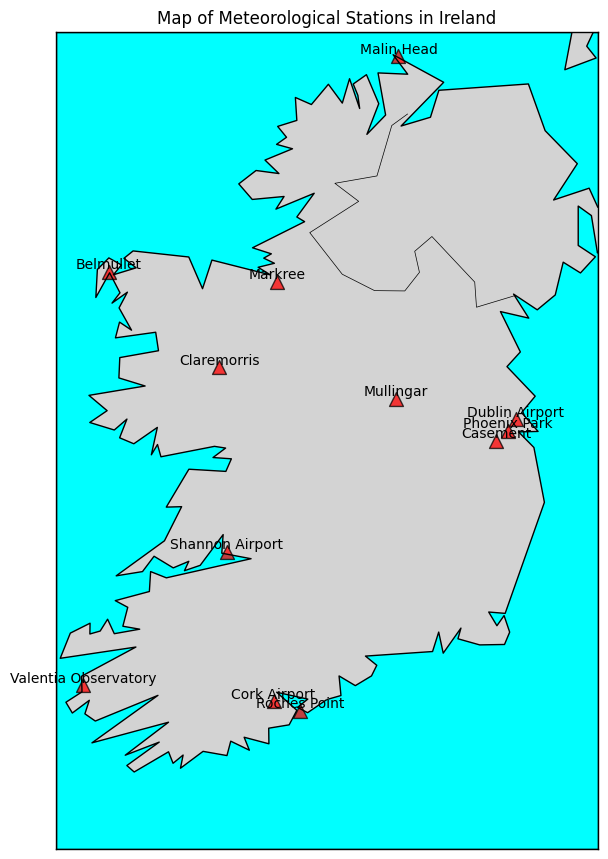

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

df = pd.read_csv('coordinates.csv')

plt.figure(figsize=(7, 11))
m = Basemap(projection='merc', llcrnrlat=51.0, urcrnrlat=55.5,
            llcrnrlon=-10.5, urcrnrlon=-5.5, lat_ts=20, resolution='l')

m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray', lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

x, y = m(df['Longitude'].values, df['Latitude'].values)

m.scatter(x, y, s=100, marker='^', color='red', edgecolor='black', linewidth=1, alpha=0.75)

# Add labels for each station
for i in range(len(df)):
    plt.text(x[i], y[i], df['Meteorological Weather Station'][i], color='black', ha='center', va='bottom')

plt.title('Map of Meteorological Stations in Ireland')
plt.show()


---

## **Intial exploration into the variables**
### **Rainfall**
The scatter plot illustarting the amount of rainfall recorded by each weather station in Ireland, which makes some for intersting reading. There's a clear increase in rainfall for Valentia Observatory (*Kerry*) and Cork Airport when compared with the dublin meteorlogical stations.

<ipython-input-28-98cdf9a7f558>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('combined_data_coordinates.csv')


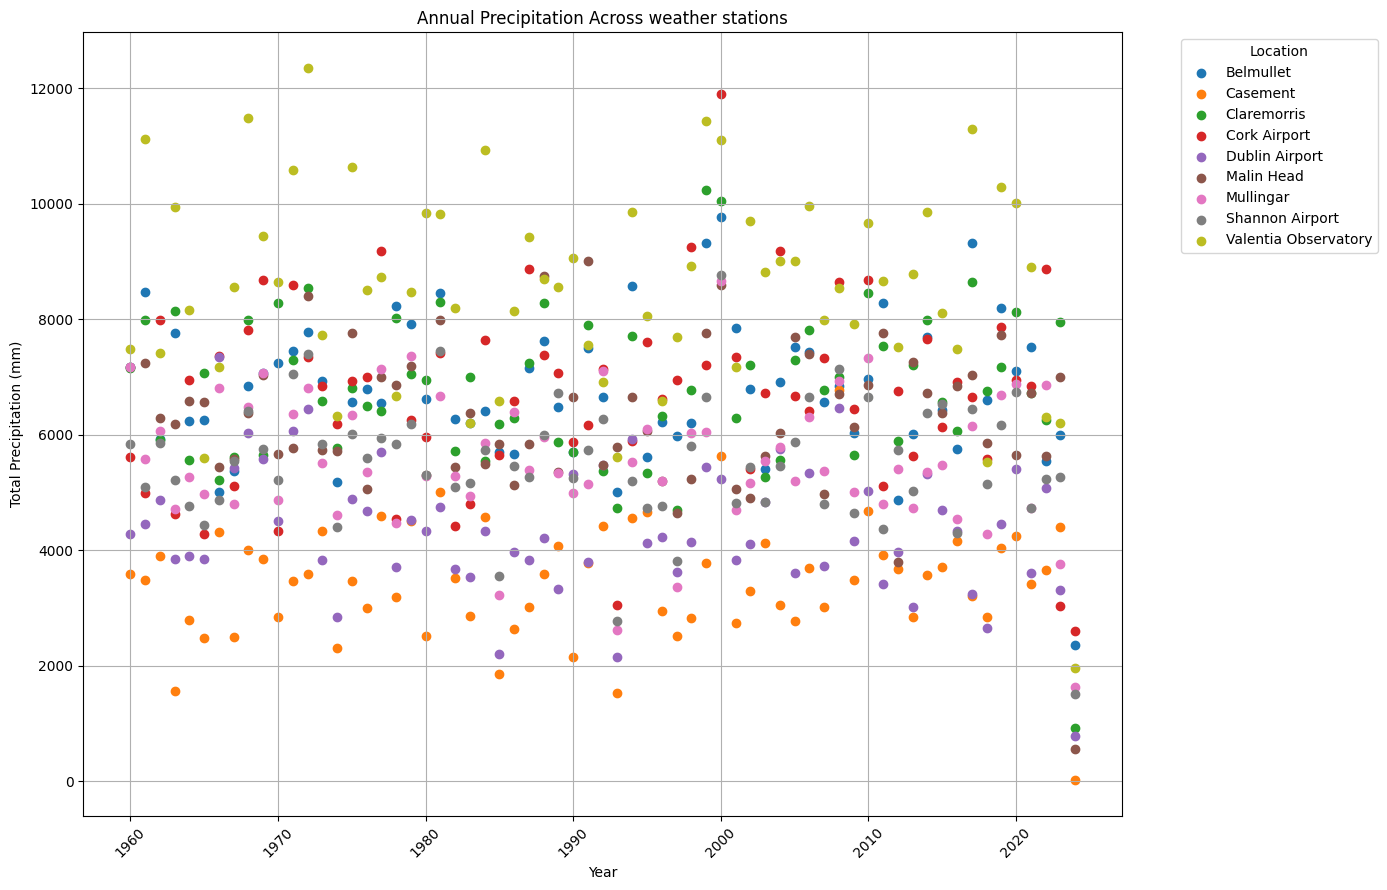

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('combined_data_coordinates.csv')

df['Year'] = pd.to_datetime(df['Month']).dt.year

# Group the data by location and year and add the precipitation
location_yearly_precipitation = df.groupby(['Meteorological Weather Station', 'Year'])['Precipitation'].sum().reset_index()

plt.figure(figsize=(14, 9))

for location in location_yearly_precipitation['Meteorological Weather Station'].unique():
    location_data = location_yearly_precipitation[location_yearly_precipitation['Meteorological Weather Station'] == location]
    plt.scatter(location_data['Year'], location_data['Precipitation'], label=location)

plt.xlabel('Year')
plt.ylabel('Total Precipitation (mm)')
plt.title('Annual Precipitation Across weather stations')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###**Wind speed**
The wind speed are far greater for the coastal weather stations in particualar the ones exposed on the north west of the island (*Belmullet and Malin Head*).
The other coastal locations still record higher wind gusts than the inland staiton (*Mullingar and Claremorris*)

<ipython-input-29-9a0c5f8bb3a9>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('combined_data_coordinates.csv')


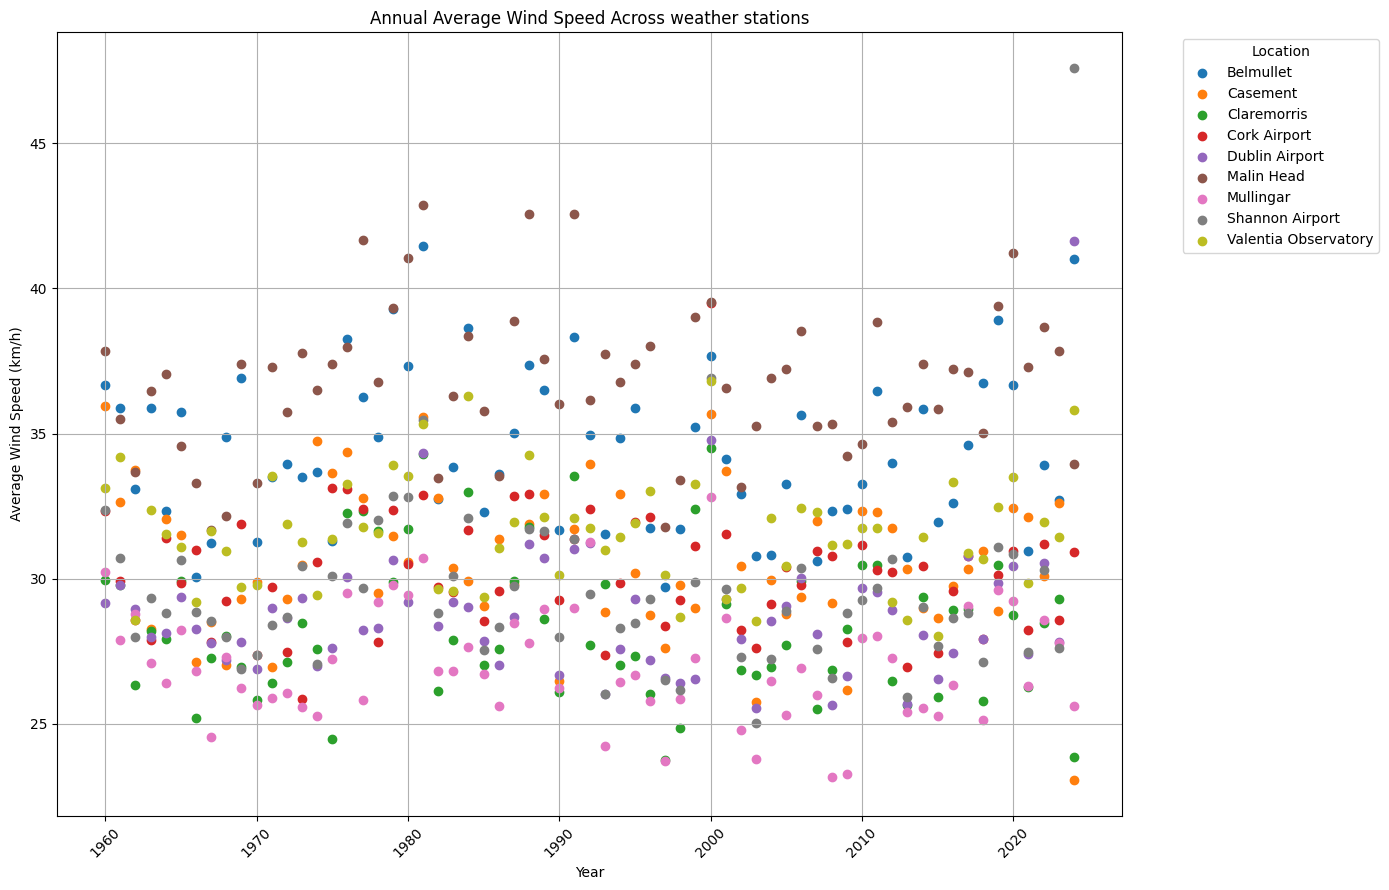

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('combined_data_coordinates.csv')

df['Year'] = pd.to_datetime(df['Month']).dt.year

# Group the data by location and year and add the average  wind speed

location_yearly_wind = df.groupby(['Meteorological Weather Station', 'Year'])['Wind'].mean().reset_index()

plt.figure(figsize=(14, 9))

for location in location_yearly_wind['Meteorological Weather Station'].unique():
    location_data = location_yearly_wind[location_yearly_wind['Meteorological Weather Station'] == location]
    plt.scatter(location_data['Year'], location_data['Wind'], label=location)

plt.xlabel('Year')
plt.ylabel('Average Wind Speed (km/h)')
plt.title('Annual Average Wind Speed Across weather stations')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###**Temperature**
From observing the scattter plot there is a slightly higher average temperature for the coastal and west coastal areas as opposed to the inland and eastern areas

<ipython-input-30-26acea67a318>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('combined_data_coordinates.csv')


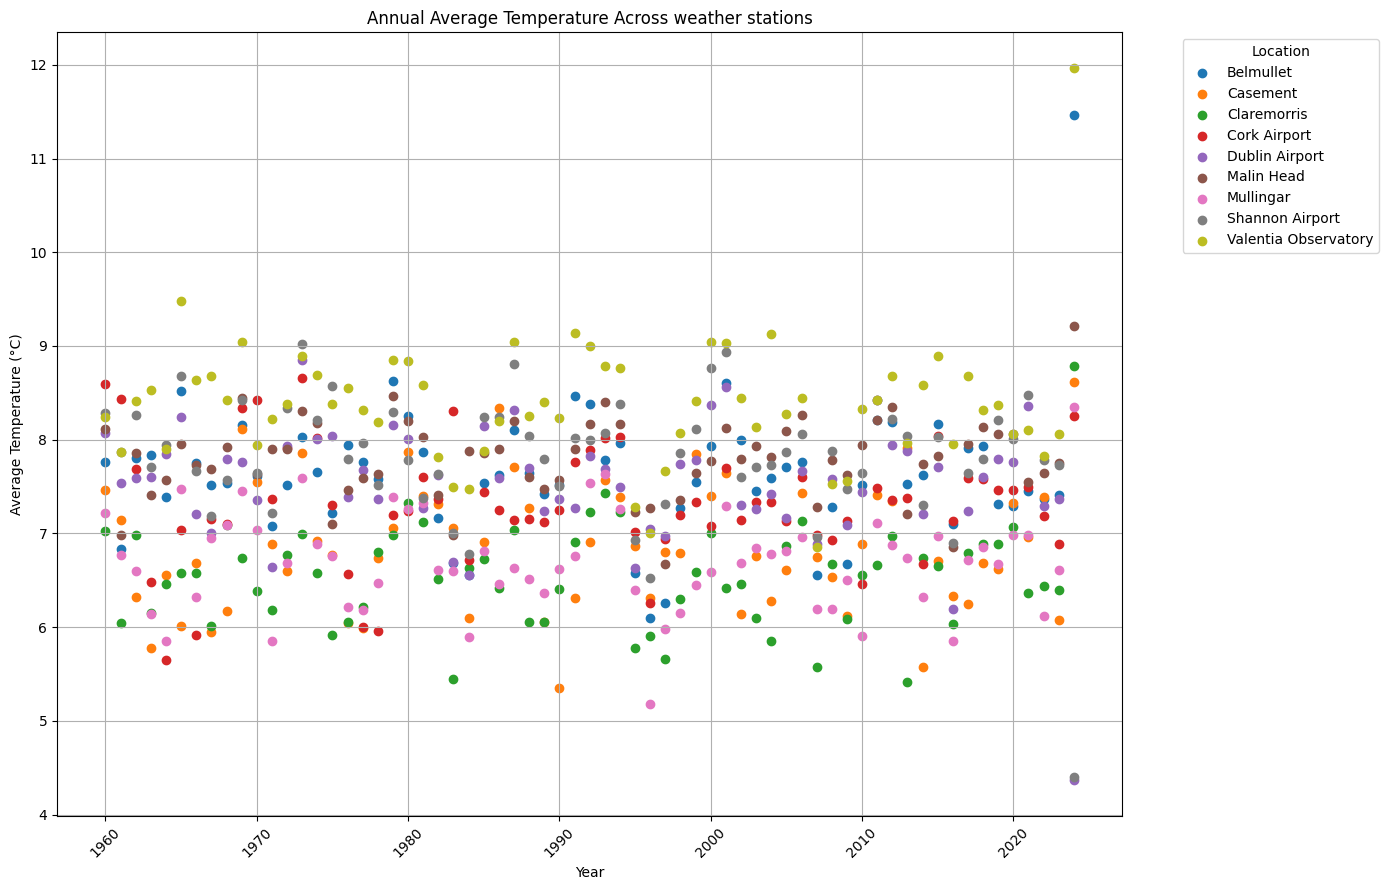

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('combined_data_coordinates.csv')

df['Year'] = pd.to_datetime(df['Month']).dt.year

# Group the data by location and year and calculate the average temperature
location_yearly_temperature = df.groupby(['Meteorological Weather Station', 'Year'])['Temperature'].mean().reset_index()

plt.figure(figsize=(14, 9))

for location in location_yearly_temperature['Meteorological Weather Station'].unique():
    location_data = location_yearly_temperature[location_yearly_temperature['Meteorological Weather Station'] == location]
    plt.scatter(location_data['Year'], location_data['Temperature'], label=location)

plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Annual Average Temperature Across weather stations')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##**3. Spatial Analysis and Visualization:**
###**How does coastal proximity affect weather patterns in Ireland?**



**I began by comparing the *Temperature*, *rainfall* and *wind gusts* using box plots**

<ipython-input-20-3719cdb0019e>:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('combined_data_coordinates.csv')


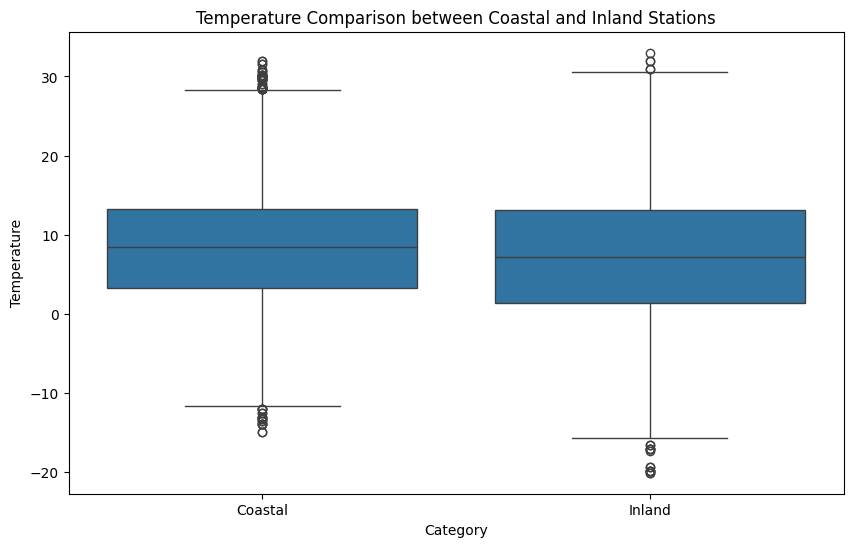

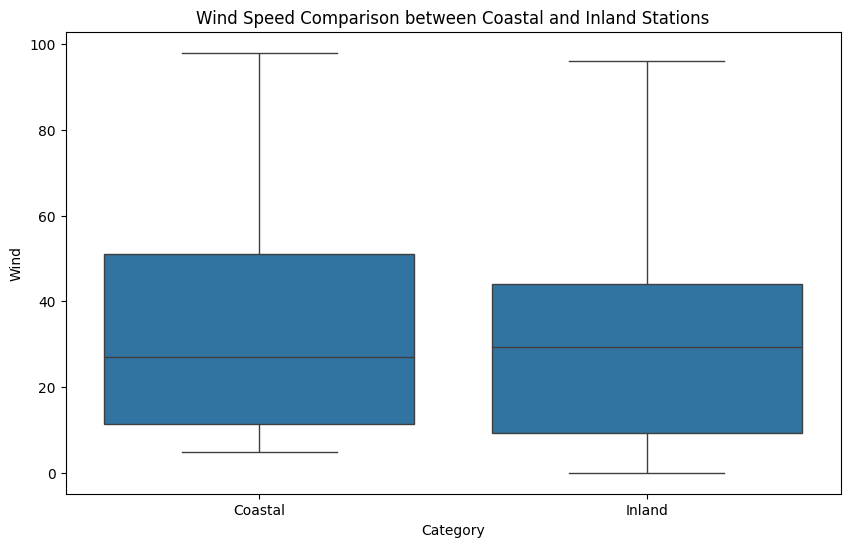

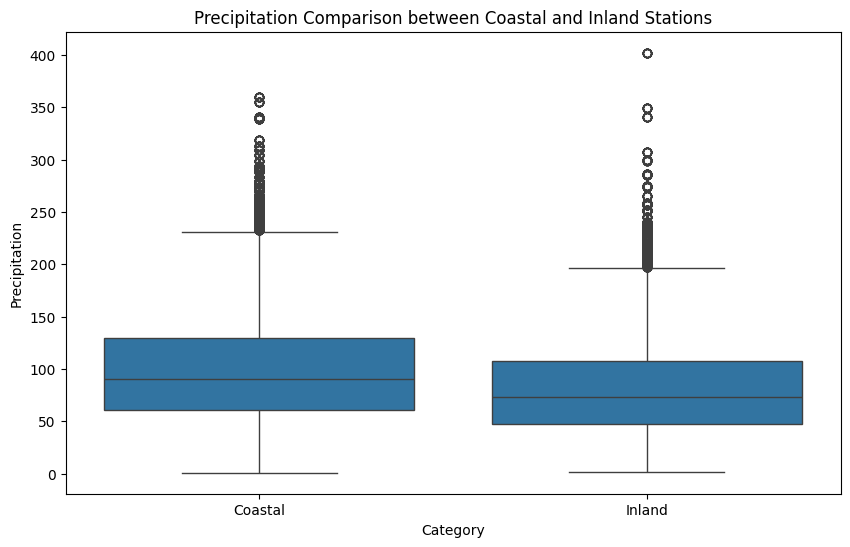

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('combined_data_coordinates.csv')

df['Month'] = pd.to_datetime(df['Month'])

# boxplot to compare temperature
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Temperature', data=df)
plt.title('Temperature Comparison between Coastal and Inland Stations')
plt.show()

# boxplot for wind speed
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Wind', data=df)
plt.title('Wind Speed Comparison between Coastal and Inland Stations')
plt.show()

# boxplot for precipitation
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Precipitation', data=df)
plt.title('Precipitation Comparison between Coastal and Inland Stations')
plt.show()



By observing the box plots, the temperature, wind and percipitation all appear to be slighting higher for the coastal stations when compared to the inland stations.

The majority of the temperature recordings are similar for both categories but there are more instances of record high temperatures.

The wind gusts experienced each month are higher on average for the coastal stations than the inland stations.

Additionally, The perciptiation per month for coastal areas is slightly higher for coastal areas.

---

###**Which areas experince the most rainfall?**

Mounted at /content/gdrive/


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


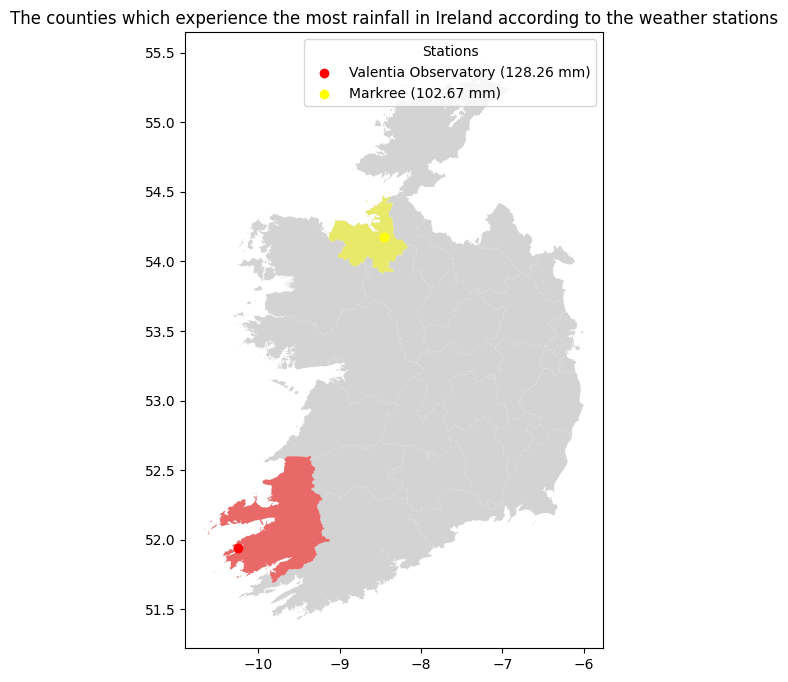

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)
r
combined_data['Month'] = pd.to_datetime(combined_data['Month'])
combined_data['Year'] = combined_data['Month'].dt.year

# Calculate average precipitation per station
average_precip = combined_data.groupby('Meteorological Weather Station')['Precipitation'].mean().reset_index()

# Sort the stations by average precipitation in descending order
sorted_stations = average_precip.sort_values('Precipitation', ascending=False)

top_wettest_stations = sorted_stations.iloc[:2]

top_stations_data = []

for i in range(2):
    station_name = top_wettest_stations.iloc[i]['Meteorological Weather Station']
    station_precip = top_wettest_stations.iloc[i]['Precipitation']
    station_data = combined_data[combined_data['Meteorological Weather Station'] == station_name].iloc[0]
    point = Point(station_data['Longitude'], station_data['Latitude'])
    top_stations_data.append({'Station': station_name, 'geometry': point, 'Precipitation': station_precip})


top_stations_locations = gpd.GeoDataFrame(top_stations_data, crs="EPSG:4326")

counties = gpd.read_file('/content/gdrive/My Drive/data_share/counties_gen.shp')

# Transform the CRS to match the counties shapefile
top_stations_locations = top_stations_locations.to_crs(counties.crs)

# Spatial join to find the counties of the top stations
top_stations_counties = gpd.sjoin(top_stations_locations, counties, how="inner", op='intersects')

# Plot the counties and the top three wettest stations
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
counties.plot(ax=ax, color='lightgray')

colors = ['red', 'yellow']
for i, row in top_stations_counties.iterrows():
    county_name = row['COUNTYNAME']
    counties[counties['COUNTYNAME'] == county_name].plot(ax=ax, color=colors[i], alpha=0.5)
    plt.scatter(row.geometry.x, row.geometry.y, label=f"{row['Station']} ({row['Precipitation']:.2f} mm)", color=colors[i])

plt.title('The counties which experience the most rainfall in Ireland according to the weather stations')
plt.legend(title='Stations')
plt.show()


Mounted at /content/gdrive/


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


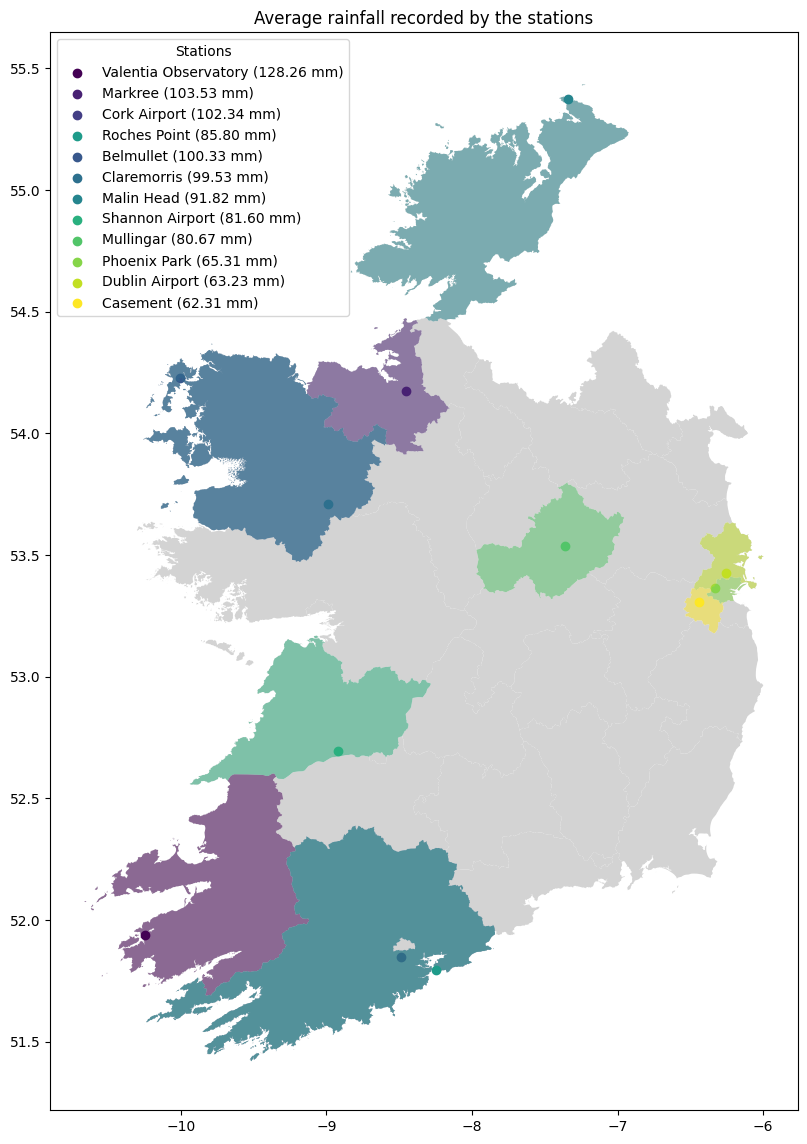

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

combined_data['Month'] = pd.to_datetime(combined_data['Month'])
combined_data['Year'] = combined_data['Month'].dt.year

# Calculate average precipitation per station
average_precip = combined_data.groupby('Meteorological Weather Station')['Precipitation'].mean().reset_index()

# Sort the stations by average precipitation in descending order
sorted_stations = average_precip.sort_values('Precipitation', ascending=False)

top_wettest_stations = sorted_stations.iloc[:12]

top_stations_data = []

for i in range(12):
    station_name = top_wettest_stations.iloc[i]['Meteorological Weather Station']
    station_precip = top_wettest_stations.iloc[i]['Precipitation']
    station_data = combined_data[combined_data['Meteorological Weather Station'] == station_name].iloc[0]
    point = Point(station_data['Longitude'], station_data['Latitude'])
    top_stations_data.append({'Station': station_name, 'geometry': point, 'Precipitation': station_precip})

top_stations_locations = gpd.GeoDataFrame(top_stations_data, crs="EPSG:4326")

counties = gpd.read_file('/content/gdrive/My Drive/data_share/counties_gen.shp')


# Transform the CRS to match the counties shapefile
top_stations_locations = top_stations_locations.to_crs(counties.crs)

# Spatial join to find the counties of the top stations
top_stations_counties = gpd.sjoin(top_stations_locations, counties, how="inner", op='intersects')

# Plot the counties and the top three wettest stations
fig, ax = plt.subplots(1, 1, figsize=(14, 14))
counties.plot(ax=ax, color='lightgray')

colors = plt.cm.viridis(np.linspace(0, 1, 12))
for i, row in top_stations_counties.iterrows():
    county_name = row['COUNTYNAME']
    counties[counties['COUNTYNAME'] == county_name].plot(ax=ax, color=colors[i], alpha=0.5)
    plt.scatter(row.geometry.x, row.geometry.y, label=f"{row['Station']} ({row['Precipitation']:.2f} mm)", color=colors[i])

plt.title('Average rainfall recorded by the stations')
plt.legend(title='Stations')
plt.show()


Based on the two maps which highlight the weather stations which recorded the most rainfall on average. There's an evident higher amount of rainfal on the coastal areas, in particular the locaitons on the west coast of Ireland.
This is likely due to the weather fronts coming from the Atlantic ocean.

---

### **Which areas experience higher winds?**


Mounted at /content/gdrive/


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


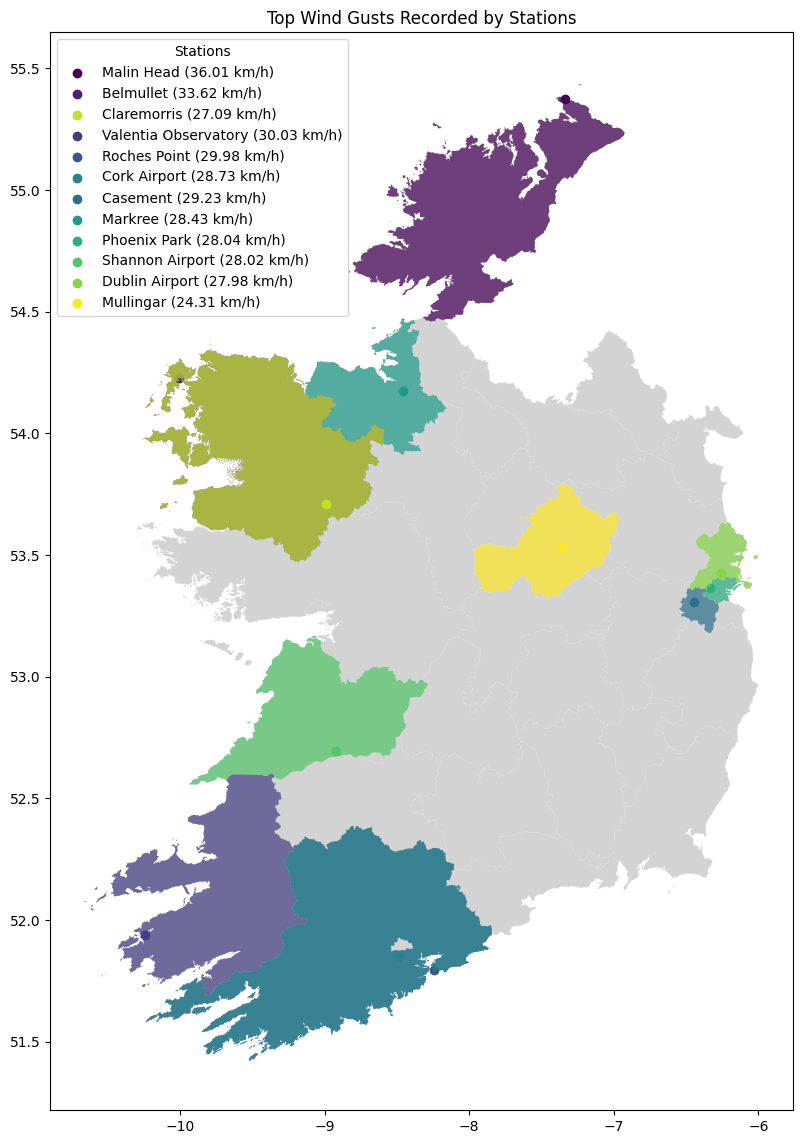

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

combined_data['Month'] = pd.to_datetime(combined_data['Month'])
combined_data['Year'] = combined_data['Month'].dt.year

# Calculate average wind gusts per station
average_wind = combined_data.groupby('Meteorological Weather Station')['Wind'].mean().reset_index()

# Sort the stations by average wind gusts in descending order
sorted_stations = average_wind.sort_values('Wind', ascending=False)

top_wind_stations = sorted_stations.iloc[:12]

top_stations_data = []

for i in range(12):
    station_name = top_wind_stations.iloc[i]['Meteorological Weather Station']
    station_wind = top_wind_stations.iloc[i]['Wind']
    station_data = combined_data[combined_data['Meteorological Weather Station'] == station_name].iloc[0]
    point = Point(station_data['Longitude'], station_data['Latitude'])
    top_stations_data.append({'Station': station_name, 'geometry': point, 'Wind': station_wind})


top_stations_locations = gpd.GeoDataFrame(top_stations_data, crs="EPSG:4326")

counties = gpd.read_file('/content/gdrive/My Drive/data_share/counties_gen.shp')

# Transform the CRS to match the counties shapefile
top_stations_locations = top_stations_locations.to_crs(counties.crs)

# Spatial join to find the counties of the top stations
top_stations_counties = gpd.sjoin(top_stations_locations, counties, how="inner", op='intersects')

# Plot the counties and the top stations with the highest wind gusts
fig, ax = plt.subplots(1, 1, figsize=(14, 14))
counties.plot(ax=ax, color='lightgray')

colors = plt.cm.viridis(np.linspace(0, 1, 12))
for i, row in top_stations_counties.iterrows():

    county_name = row['COUNTYNAME']
    counties[counties['COUNTYNAME'] == county_name].plot(ax=ax, color=colors[i], alpha=0.7)
    plt.scatter(row.geometry.x, row.geometry.y, label=f"{row['Station']} ({row['Wind']:.2f} km/h)", color=colors[i])

plt.title('Top Wind Gusts Recorded by Stations')
plt.legend(title='Stations')
plt.show()


Similarly to the rainfall map, the average wind gusts experienced in the locations vary depending largely on if they're located on the west coast of Ireland.

The lowest recorded wind gusts are experinced by the most inland weather station (Mullingar) and the windiest location is (Malin head), which supports the belief that it's much windier on the coast.

---

###**What area has recorded the highest average highest temperature?**

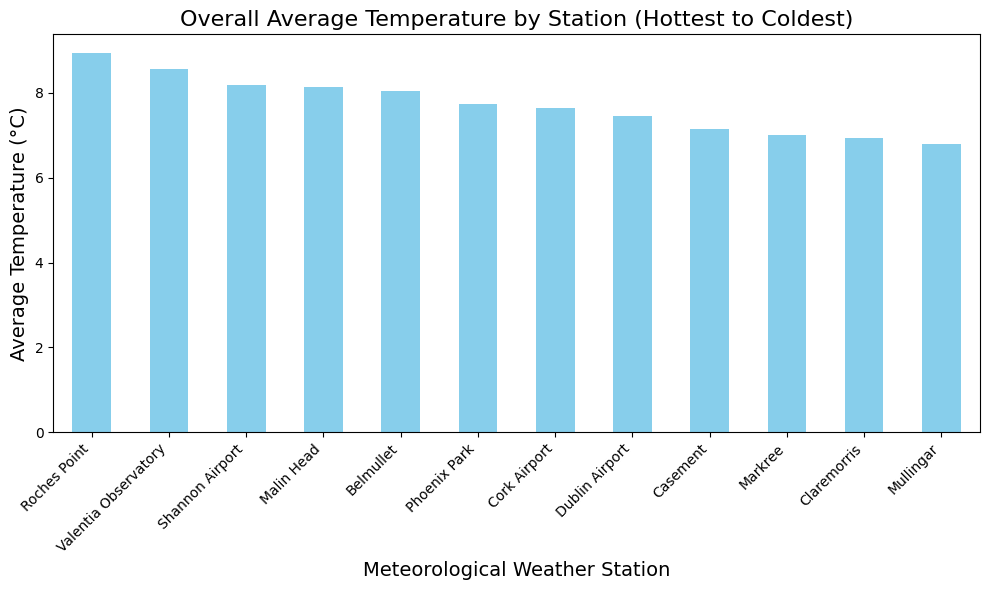

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

combined_data['Month'] = pd.to_datetime(combined_data['Month'])

# Group by station and calculate the overall average temperature
average_temperature = combined_data.groupby('Meteorological Weather Station')['Temperature'].mean()

# Sort the temperatures from highest to lowest
average_temperature_sorted = average_temperature.sort_values(ascending=False)


fig, ax = plt.subplots(figsize=(10, 6))
average_temperature_sorted.plot(kind='bar', ax=ax, color='skyblue')


ax.set_title('Overall Average Temperature by Station (Hottest to Coldest)', fontsize=16)
ax.set_xlabel('Meteorological Weather Station', fontsize=14)
ax.set_ylabel('Average Temperature (°C)', fontsize=14)
ax.set_xticklabels(average_temperature_sorted.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
import folium
from folium.plugins import HeatMap
import pandas as pd
from IPython.display import display

df = pd.read_csv('combined_data_coordinates.csv')

df['Year'] = pd.to_datetime(df['Month']).dt.year

# Create a base map
m = folium.Map(location=[53.1424, -7.6921], zoom_start=6)

heatmap_radius = 30

# Aggregate temperature data by Meteorological Weather Station for the average temperature
temperature_data = df.groupby('Meteorological Weather Station').agg({
    'Temperature': 'mean',
    'Latitude': 'first',
    'Longitude': 'first'
}).reset_index()

# heatmap data list
heatmap_data = [
    (row['Latitude'], row['Longitude'], row['Temperature'])
    for index, row in temperature_data.iterrows()
    if not pd.isna(row['Temperature'])
]

# heatmap layer with increased radius
heatmap_layer = HeatMap(heatmap_data, radius=heatmap_radius)

heatmap_layer.add_to(m)

display(m)


<ipython-input-82-ec8c1519fec7>:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('combined_data_coordinates.csv')


The average temperatures experienced by the locations is quite similar but there's still a higher avergae temperatre for the coastal areas, in particualr the west coast. This is likely due to the westerly winds blowing warm moist air into the west coast, whilst the east coast of ireland is slighty cooler largley due to the cold winds in winter.

---

### Are the coastal areas more prone to extreme weather conditions?


In [22]:
import pandas as pd
import numpy as np

# calculate thresholds for extremes
precipitation_threshold_high = np.percentile(combined_data['Precipitation'], 99)
wind_gust_threshold_high = np.percentile(combined_data['Wind'], 99)

combined_data['ExtremePrecipitation'] = combined_data['Precipitation'] > precipitation_threshold_high
combined_data['ExtremeWindGusts'] = combined_data['Wind'] > wind_gust_threshold_high

# group by Meteorological Weather Station and count extremes
extreme_weather_counts = combined_data.groupby('Meteorological Weather Station')[['ExtremePrecipitation', 'ExtremeWindGusts']].sum()

extreme_weather_counts['ExtremeWeatherEvents'] = extreme_weather_counts.sum(axis=1)

# rank the locations by the total number of extreme events
extreme_weather_counts['Rank'] = extreme_weather_counts['ExtremeWeatherEvents'].rank(ascending=False)

extreme_weather_counts_sorted = extreme_weather_counts.sort_values('Rank')

print(extreme_weather_counts_sorted)


                                ExtremePrecipitation  ExtremeWindGusts  \
Meteorological Weather Station                                           
Valentia Observatory                             516                54   
Belmullet                                         72               270   
Malin Head                                        36               288   
Cork Airport                                     120                24   
Claremorris                                       60                48   
Shannon Airport                                   12                54   
Casement                                           0                42   
Roches Point                                      12                18   
Mullingar                                         12                12   
Dublin Airport                                     0                12   
Markree                                           12                 0   
Phoenix Park                          

I began by calculating the 99th percintile of rainfall and wind gusts to indicate what was an 'extreme' weather condition.

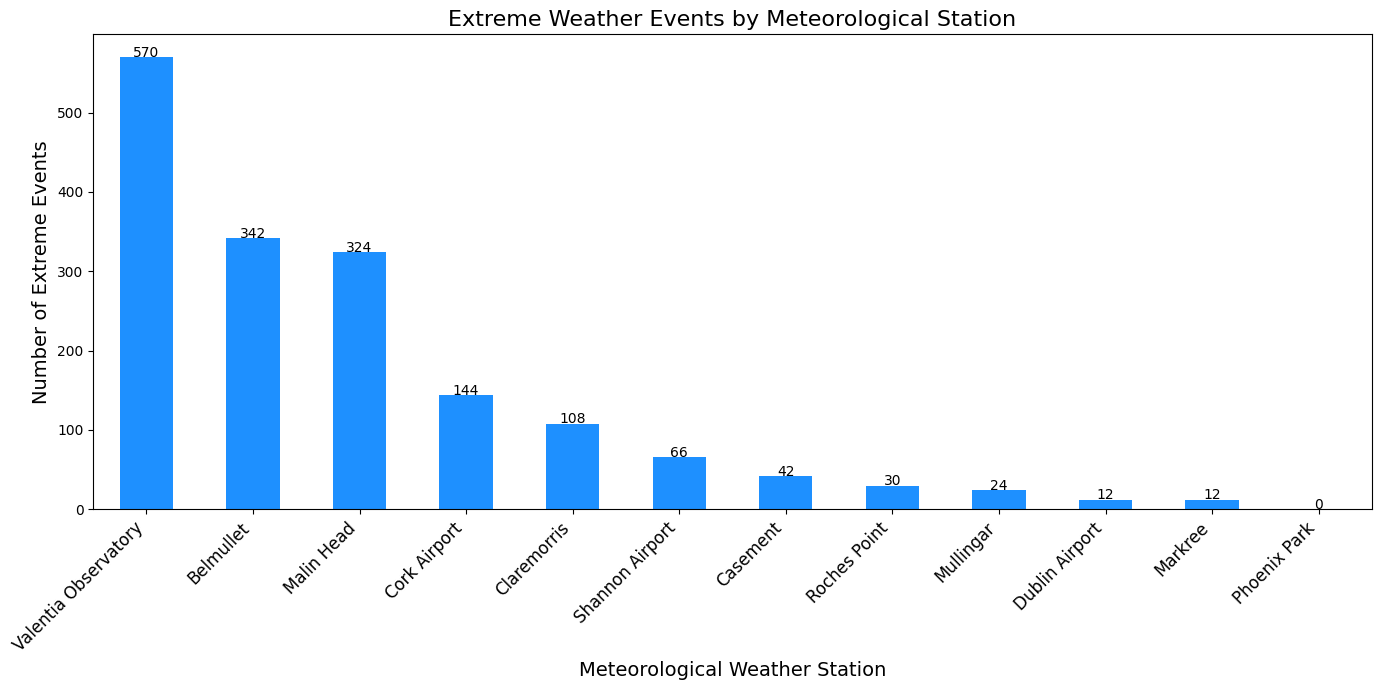

In [23]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(14, 7))
extreme_weather_counts_sorted['ExtremeWeatherEvents'].plot(kind='bar', ax=ax, color='dodgerblue')

# Adding titles and labels
ax.set_title('Extreme Weather Events by Meteorological Station', fontsize=16)
ax.set_xlabel('Meteorological Weather Station', fontsize=14)
ax.set_ylabel('Number of Extreme Events', fontsize=14)
ax.set_xticklabels(extreme_weather_counts_sorted.index, rotation=45, ha='right', fontsize=12)

for i, v in enumerate(extreme_weather_counts_sorted['ExtremeWeatherEvents']):
    ax.text(i, v + 0.5, str(v), color='black', ha='center')

plt.tight_layout()
plt.show()


The weather stations which experienced the most extreme weather conditons are all located on the west coast.

In [24]:
import folium
import pandas as pd
import numpy as np

combined_data = pd.read_csv('combined_data_coordinates.csv')
combined_data['Month'] = pd.to_datetime(combined_data['Month'])

# calculate thresholds for extremes
precipitation_threshold_high = np.percentile(combined_data['Precipitation'].dropna(), 99)
wind_gust_threshold_high = np.percentile(combined_data['Wind'].dropna(), 99)

# mark extreme events
combined_data['ExtremePrecipitation'] = combined_data['Precipitation'] > precipitation_threshold_high
combined_data['ExtremeWindGusts'] = combined_data['Wind'] > wind_gust_threshold_high

# count occurrences of each condition at each location
event_count = combined_data.groupby(['Latitude', 'Longitude']).agg({
    'ExtremePrecipitation': 'sum',
    'ExtremeWindGusts': 'sum',
}).reset_index()

# map centered around a centre of ireland
m = folium.Map(location=[53.1424, -7.6921], zoom_start=7)

max_size = 60
# Chatgpt helped with getting the points onto the map, i kept running into an error
for idx, row in event_count.iterrows():
    for condition, color in zip(['ExtremePrecipitation', 'ExtremeWindGusts'], ['blue', 'red']):
        if row[condition] > 0:
            radius = 5 + (row[condition] / max(event_count[condition]) * max_size)
            folium.CircleMarker(
                location=[row['Latitude'], row['Longitude']],
                radius=radius,
                color=color,
                fill=True,
                fill_color=color,
                fill_opacity=0.5,
                popup=f"{condition.replace('Extreme', '')} Events: {row[condition]}"
            ).add_to(m)


from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}
<div style="position: fixed;
            bottom: 50px; left: 50px; width: 300px; height: 100px;
            border:2px solid grey; z-index:9999; font-size:14px;
            background-color:white; opacity: 0.7;">
    <p style="margin:10px;"><b>Circle Size and Color Legend</b></p>
    <p style="margin:10px;">Blue: Precipitation Events<br>Red: Wind Gust Events<br>Size: Number of Events</p>
</div>
{% endmacro %}
"""

macro = MacroElement()
macro._template = Template(template)

m.get_root().add_child(macro)

m


<ipython-input-24-350cd461bdb5>:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_data = pd.read_csv('combined_data_coordinates.csv')


Based on the bar chart and the map used to visualise the extreme weather conditions, the west coast of irelnad is far more prone is extreme weather condtitions. This is likely to do with the the exposure to the atlantic ocean. In contrast, the east coast which is largely sheltered by the surrounding land to the east.

---

#**Spatial Analysis**

##**Calculating the correlation Coefficient between the selected weather features and the distance from the coast**

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

combined_data = pd.read_csv('combined_data.csv')

# dictionary with the station names and their corresponding distance from the coast
distance_from_coast = {
    'Malin Head': 0,
    'Roches Point': 0,
    'Valentia': 0,
    'Belmullet': 4,
    'Cork Airport': 15,
    'Claremorris': 45,
    'Dublin Airport': 10,
    'Casement': 22,
    'Phoenix Park': 18,
    'Shannon Airport': 5,
    'Markree': 17,
    'Mullingar':160
}

#  Weather Stationwith its distance from the coast
combined_data['DistanceFromCoast'] = combined_data['Meteorological Weather Station'].map(distance_from_coast)

# check for missing values and handle them
combined_data = combined_data.dropna(subset=['Wind', 'DistanceFromCoast'])

# calculate the Pearson correlation coefficient between wind speed and distance from coast
correlation, p_value = pearsonr(combined_data['Wind'], combined_data['DistanceFromCoast'])

print(f'The correlation coefficient between wind speed and distance from the coast is: {correlation:.3f}')
print(f"The p-value of the correlation is: {p_value:.3e}")



The correlation coefficient between wind speed and distance from the coast is: -0.110
The p-value of the correlation is: 1.520e-218


A correlation coefficient of -0.110 indicates a slight negative relationship between the wind speed and the distance to the coast. Which means as the distance from the coast increases the wind speed would be expecetd to decrease. The value would be expected to be higher but this could be due to the lack of avaiable data for inland weather stations that would work for my analysis.
The value indicates a slight correlation but it's not the main factor contributing to the high winds in the different locations.

Based on the p value being extremely close to 0, which is way <0.05, it supports that the negative relationship between the wind and distance from the coast is not down to random chance.

The likely reason for the correlation coeffcient being quite low is due the proximity to the west coast of ireland likely being the main contributing factor.

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

combined_data = pd.read_csv('combined_data.csv')

# dictionary with the station names and their corresponding distance from the coast
distance_from_coast = {
    'Malin Head': 0,
    'Roches Point': 0,
    'Valentia': 0,
    'Belmullet': 4,
    'Cork Airport': 15,
    'Claremorris': 45,
    'Dublin Airport': 10,
    'Casement': 22,
    'Phoenix Park': 18,
    'Shannon Airport': 5,
    'Markree': 17,
    'Mullingar':160
}

# Weather Station with its distance from the coast
combined_data['DistanceFromCoast'] = combined_data['Meteorological Weather Station'].map(distance_from_coast)

# check for missing values and handle them
combined_data = combined_data.dropna(subset=['Precipitation', 'DistanceFromCoast'])

# calculate the Pearson correlation coefficient between wind speed and distance from coast
correlation, p_value = pearsonr(combined_data['Precipitation'], combined_data['DistanceFromCoast'])

print(f'The correlation coefficient between rain and distance from the coast is: {correlation:.3f}')
print(f"The p-value of the correlation is: {p_value:.3e}")



The correlation coefficient between rain and distance from the coast is: -0.026
The p-value of the correlation is: 7.241e-14


In [ ]:
import pandas as pd
from scipy.stats import pearsonr

combined_data = pd.read_csv('combined_data.csv')

# dictionary with the station names and their corresponding distance from the coast
distance_from_coast = {
    'Malin Head': 0,
    'Roches Point': 0,
    'Valentia': 0,
    'Belmullet': 4,
    'Cork Airport': 15,
    'Claremorris': 45,
    'Dublin Airport': 10,
    'Casement': 22,
    'Phoenix Park': 18,
    'Shannon Airport': 5,
    'Markree': 17,
    'Mullingar':160
}

#  Weather Station with its distance from the coast
combined_data['DistanceFromCoast'] = combined_data['Meteorological Weather Station'].map(distance_from_coast)

# Check for missing values and handle them
combined_data = combined_data.dropna(subset=['Temperature', 'DistanceFromCoast'])

# calculate the Pearson correlation coefficient between wind speed and distance from coast
correlation, p_value = pearsonr(combined_data['Temperature'], combined_data['DistanceFromCoast'])

print(f'The correlation coefficient between temperature and distance from the coast is: {correlation:.3f}')
print(f"The p-value of the correlation is: {p_value:.3e}")



The correlation coefficient between rain and distance from the coast is: -0.047
The p-value of the correlation is: 3.693e-41


The correlation coefficients and P-value are both similar for the rainfall and temperature. They indicate a slighlty negative correlation between temperature and distance from the coast, and the rainfall and the distance from the coast.

 Which is what I observed in the visualisation above, however, the low values indicate that the distance from the coast isn't the main contributing factor. Furthermore, I expect that the warm moist front coming from the Atlantic ocean is liekly a more relevant reason.

If I had more availbale data for inland weather station i suspect there would be a much higher correlation, when observing the most inland station Mullingar, it appeared at the bottom of both these factors.

In [26]:
!pip install --upgrade contextily
!pip install pyproj


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 35.3 MB/s eta 0:00:00


##**Calculating the K-Means Clustering for the selected features**

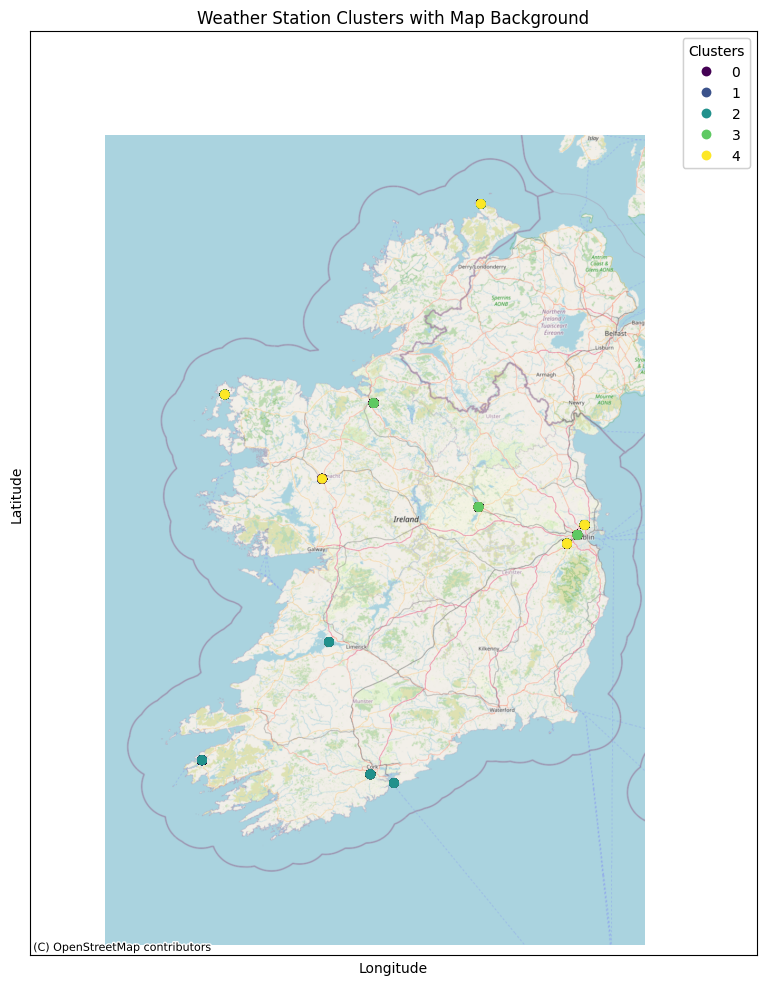

In [27]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import contextily as ctx
from pyproj import Transformer

# I used Chatgpt to help create this, I was running into problems getting the map to display behind the point and it helped me to create it.

combined_data = pd.read_csv('combined_data_coordinates.csv', dtype={'Month': str}, low_memory=False)

data_for_clustering = combined_data[['Wind', 'Precipitation', 'Temperature','Latitude', 'Longitude']].dropna()

# Normalise data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_for_clustering[['Wind', 'Precipitation', 'Temperature']])

# Fit K-means
kmeans = KMeans(n_clusters=5, random_state=0, n_init=10)
clusters = kmeans.fit_predict(data_normalized)

# Add cluster info to the DataFrame
data_for_clustering['Cluster'] = clusters

# initialise the Transformer from pyproj for coordinate transformation
transformer = Transformer.from_crs("epsg:4326", "epsg:3857", always_xy=True)

# Apply the transformation
data_for_clustering['coords_x'], data_for_clustering['coords_y'] = transformer.transform(
    data_for_clustering['Longitude'].values, data_for_clustering['Latitude'].values
)

fig, ax = plt.subplots(figsize=(14, 12))

scatter = ax.scatter(data_for_clustering['coords_x'], data_for_clustering['coords_y'],
                     c=data_for_clustering['Cluster'], cmap='viridis')

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend1)

ax.set_title('Weather Station Clusters with Map Background')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.set_xticks([])
ax.set_yticks([])

padding = 200000
ax.set_xlim(data_for_clustering['coords_x'].min() - padding, data_for_clustering['coords_x'].max() + padding)
ax.set_ylim(data_for_clustering['coords_y'].min() - padding, data_for_clustering['coords_y'].max() + padding)


plt.show()


Based on the K-means clustering the weather stations are clustered into 3 clusters based on the similarity of the 3 factors.

It shows that the stations in the south west of ireland are all grouped together. With more weather station locations I suspect the distribution would be slightly different. The stations are roughly clusted by their location due to the similar weather they experience.

There is a clear climatic zone in the south of the country, along with the most westerly points, however, a climatic zone isn't really present in Dublin.

---

#**Reflection**

Upon reflection, I think this illustrates the difference in wind rate, temperature and rainfall depending on whether the locaiton is coastal or inland. The visualisation indicate an increase in all the factors when comparing the most inland weather stations to the most coatsal weather stations and this is supported by the visualisations and the correlation cooefficient.

However, the analysis would have been further enhanced if I was able to access more inland weather station data, there was some weather station datasets for other inland station but in most cases it only recorded the past couple of years or it only included data that was recorded a long time ago, which I didn't think was adequete for my analysis. Although, the analysis was still effective in exploring the relationship, this would have elevated it and further supported the theory.

Throughout my analysis I noticed the west coast of Ireland had far higher recordings for all the factors. Upon this discovery, I came accross an article from [Research Gate](https://www.researchgate.net/post/Why_do_east_and_west_coasts_have_different_climates_and_climate_of_a_coastal_location_compared_to_climate_of_an_inland_location_at_same_latitude#:~:text=The%20cold%20temperature%20on%20the,the%20ocean%20during%20the%20winter.) which explained the reason for the elevated weather conidtion in the west of Ireland.

"The cold temperature on the East Coast is due to the winds. In the winter, the westerly winds blow warm moist air onto the West Coast, which makes it rain so much. Since land cools and heats more than the ocean does, the land is much colder than the ocean during the winter. The West Coast has the relatively mild Pacific to its west, which keeps us warm in winter and cool in summer. The East Coast has a large continental area to its west which is cold in winter and warm in the summer"

In conclussion, I gained great insight into the intersting weather system in Ireland. It has surprised me that for such a small country it can have many climatic zones and how the distance from the coast can so strongly affect weather condtions. I was also unaware of the impact that the Atlantic ocean and the weather fronts coming from that direction have such a large impact on the weather for a huge portion of the country.

---